<a href="https://colab.research.google.com/github/rabnawaz172/Mushrrom/blob/main/mushroom100classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 5003 images belonging to 50 classes.
Epoch 1/50
157/157 [==============================] - 308s 2s/step - loss: 3.6015 - accuracy: 0.0756 - val_loss: 3.0702 - val_accuracy: 0.1661
Epoch 2/50
157/157 [==============================] - 353s 2s/step - loss: 2.9056 - accuracy: 0.2063 - val_loss: 2.5098 - val_accuracy: 0.3040
Epoch 3/50
157/157 [==============================] - 358s 2s/step - loss: 2.4465 - accuracy: 0.3226 - val_loss: 2.1913 - val_accuracy: 0.3722
Epoch 4/50
157/157 [==============================] - 308s 2s/step - loss: 2.2212 - accuracy: 0.3712 - val_loss: 1.9726 - val_accuracy: 0.4349
Epoch 5/50
157/157 [==============================] - 305s 2s/step - loss: 1.9246 - accuracy: 0.4425 - val_loss: 1.6771 - val_accuracy: 0.5201
Epoch 6/50
157/157 [==============================] - 355s 2s/step - loss: 1.7298 - accuracy: 0.4929 - val_loss: 1.5093 - val_accuracy: 0.5655
Epoch 7/50
157/157 [==============================] - 359s 2s/step - loss: 1.5346 - accuracy: 0.549

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


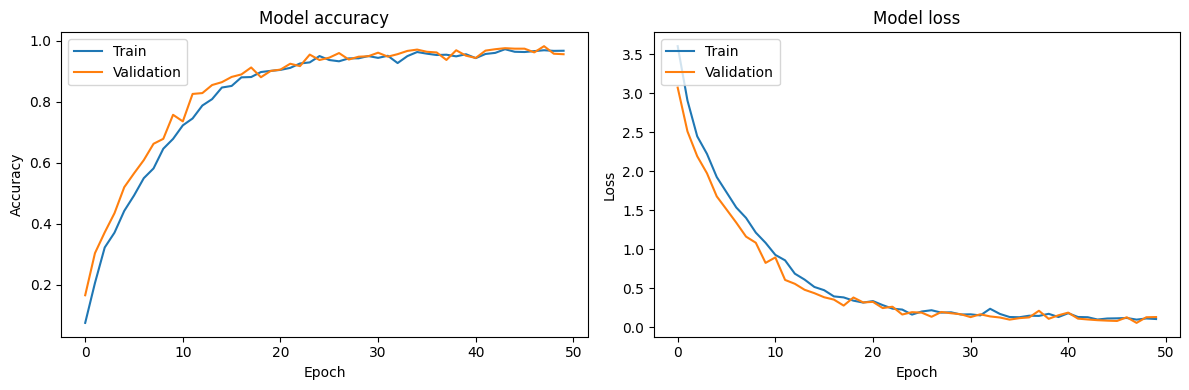

Found 5003 images belonging to 50 classes.
157/157 [==============================] - 93s 592ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       100
           1       0.87      0.98      0.92       100
           2       0.91      0.96      0.93       100
           3       1.00      0.90      0.95       100
           4       0.92      0.97      0.94       100
           5       0.93      1.00      0.96       100
           6       0.98      0.96      0.97       100
           7       0.78      1.00      0.88       100
           8       0.97      0.99      0.98       100
           9       0.97      0.98      0.98       100
          10       0.98      0.98      0.98       100
          11       1.00      0.99      1.00       103
          12       1.00      0.99      0.99       100
          13       0.99      0.91      0.95       100
          14       1.00      0.92      0.96       100
         

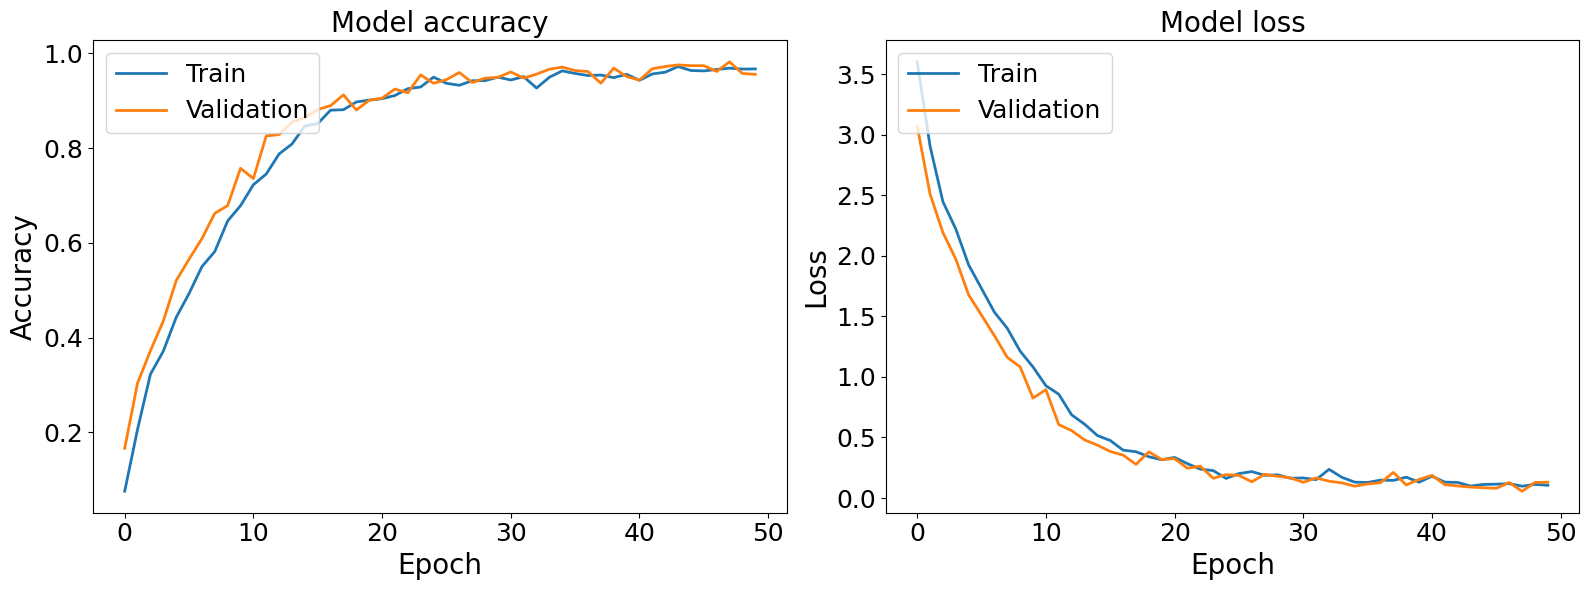

Found 5003 images belonging to 50 classes.
157/157 [==============================] - 93s 590ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       100
           1       0.90      1.00      0.95       100
           2       0.94      0.95      0.95       100
           3       1.00      0.87      0.93       100
           4       0.86      0.96      0.91       100
           5       0.98      0.98      0.98       100
           6       0.99      0.95      0.97       100
           7       0.79      1.00      0.88       100
           8       0.94      1.00      0.97       100
           9       0.97      0.98      0.98       100
          10       0.97      0.95      0.96       100
          11       1.00      0.98      0.99       103
          12       1.00      0.98      0.99       100
          13       1.00      0.89      0.94       100
          14       0.98      0.94      0.96       100
         

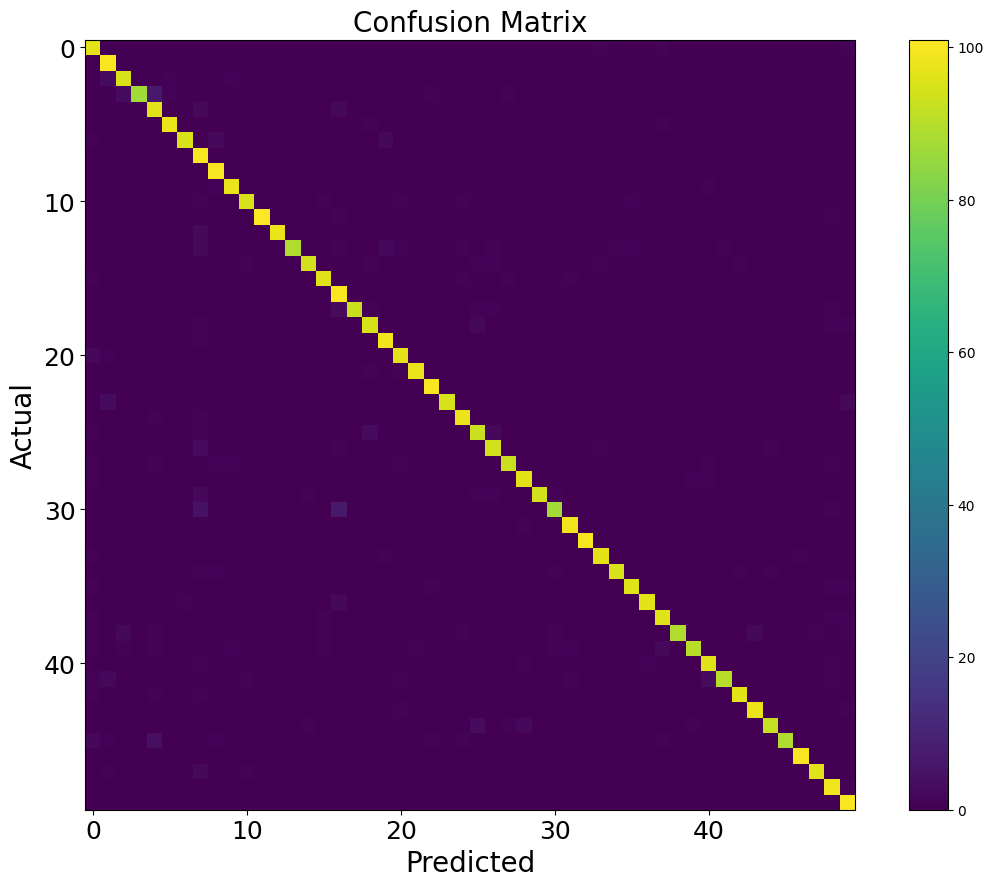

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


UnimplementedError: /content/gdrive/mydrive; Operation not supported

In [ ]:
#first
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Set your data directory
data_dir = '/content/gdrive/MyDrive/dataset2'

# Define parameters
batch_size = 32
image_size = (128, 128)  # Adjust the image size as needed

# Create ImageDataGenerator for training (with validation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(image_size[0], image_size[1], 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the same data for training and validation
epochs = 1  # Adjust the number of epochs as needed

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=train_generator  # Use the same data for validation
)

# Save the trained model
model.save('/content/gdrive/MyDrive/Mushroom/mushroom_model1.h5')



# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Validation accuracy plot
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model and print classification report and confusion matrix
eval_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_true = eval_generator.classes
y_pred = model.predict(eval_generator)

# Convert predictions to class labels
y_pred_classes = tf.argmax(y_pred, axis=1)

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))
# Plot training & validation accuracy values
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)  # Validation accuracy plot
plt.title('Model accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'], linewidth=2)
plt.title('Model loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

# Evaluate the model and print classification report and confusion matrix
eval_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_true = eval_generator.classes
y_pred = model.predict(eval_generator)

# Convert predictions to class labels
y_pred_classes = tf.argmax(y_pred, axis=1)

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))

# Plot confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(14, 10))
plt.imshow(conf_mat, cmap='viridis')
plt.colorbar()
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Save the model in Keras format
model.save("/content/gdrive/mydrive/mymodel/_model.h5")



NameError: name 'history' is not defined

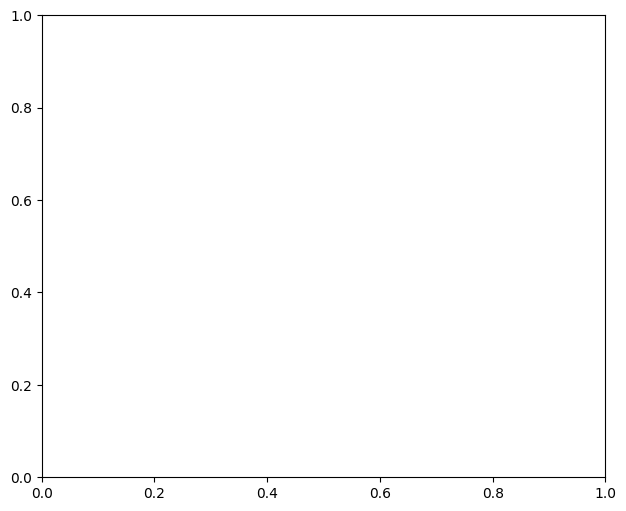

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Plot training & validation accuracy values
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)  # Validation accuracy plot
plt.title('Model accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'], linewidth=2)
plt.title('Model loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

# Evaluate the model and print classification report and confusion matrix
eval_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_true = eval_generator.classes
y_pred = model.predict(eval_generator)

# Convert predictions to class labels
y_pred_classes = tf.argmax(y_pred, axis=1)

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))

# Plot confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(14, 10))
plt.imshow(conf_mat, cmap='viridis')
plt.colorbar()
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Save the model in Keras format
model.save("youpath/_model.h5")


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Specify the path to your dataset in Google Drive
drive_path = '/content/gdrive/MyDrive/dataset2'

# Specify the path where you want to copy the dataset in Colab
colab_path = '/content/dataset2'


In [ ]:
%cd '/content/gdrive/MyDrive/dataset2'


/content/gdrive/MyDrive/dataset2


In [ ]:
!ls '/content/gdrive/MyDrive/dataset2'

'Lactarius turpis'	   'Peltigera praetextata'     'Schizophyllum commune'
'Laetiporus sulphureus'    'Phaeophyscia orbicularis'  'Stereum hirsutum'
'Leccinum albostipitatum'  'Phallus impudicus'	       'Stropharia aeruginosa'
'Leccinum aurantiacum'	   'Phellinus igniarius'       'Suillus granulatus'
'Leccinum scabrum'	   'Phellinus tremulae'        'Suillus grevillei'
'Leccinum versipelle'	   'Phlebia radiata'	       'Suillus luteus'
'Lepista nuda'		   'Pholiota aurivella'        'Trametes hirsuta'
'Lobaria pulmonaria'	   'Pholiota squarrosa'        'Trametes ochracea'
'Lycoperdon perlatum'	   'Physcia adscendens'        'Trametes versicolor'
'Macrolepiota procera'	   'Platismatia glauca'        'Tremella mesenterica'
'Merulius tremellosus'	   'Pleurotus ostreatus'       'Trichaptum biforme'
'Mutinus ravenelii'	   'Pleurotus pulmonarius'     'Tricholomopsis rutilans'
'Nectria cinnabarina'	   'Pseudevernia furfuracea'   'Urnula craterium'
'Panellus stipticus'	   'Rhytisma acerinum'	    